In [4]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

<center><h1> MCD - Ciencia de Datos Responsable </h1><center>
<center><h2> Tarea 3: Modelos interpretables y xAI <h2><center>    

    
## Instrucciones:

- La siguiente tarea es **individual**. 
- La calificación de esta tarea se hará de forma **manual**, es decir, esta tarea no cuenta con test cases automáticos. Es por esto que al hacer entrega de su tarea podrá ver una calificación de "0%" y "Aprobado", independiente del contenido de su notebook.
- Cuenta con intentos ilimitados para el envío de su tarea.
- Ante cualquier duda o consulta pueden comunicarse a través de Foros o Salesforce. 

In [5]:
df = pd.read_csv('adult_data.csv')
df.head()

age  workclass     education  education-num      marital-status  \
0  25.0    Private          11th            7.0       Never-married   
1  38.0    Private       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  Some-college           10.0  Married-civ-spouse   
4  34.0    Private          10th            6.0       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black  Male           0.0           0.0   
1    Farming-fishing        Husband  White  Male           0.0           0.0   
2    Protective-serv        Husband  White  Male           0.0           0.0   
3  Machine-op-inspct        Husband  Black  Male        7688.0           0.0   
4      Other-service  Not-in-family  White  Male           0.0           0.0   

   hours-per-week native-country income  
0            40.0  United-States  <=50K  
1            50.0  United-States  <=50K  
2            40.0  United-States   >50K  
3            40.0  United-States   >50K  
4            30.0  United-States  <=50K

### Pregunta 1: Preprocese los datos de Census Income Dataset. Luego, entrene un árbol de decisión y evalúe este modelo desde la perspectiva de la interpretabilidad global. Utilice tanto tree_plot como un gráfico de la importancia de las features (3 ptos). 

**Instrucciones adicionales:** 

- Haga uso de los métodos que le provee el mismo modelo (intrinsicamente interpretable).

### Pregunta 2: Entrene otro modelo (que no sea interpretable) y realice el procedimiento necesario para obtener explicabilidad local de este modelo utilizando LIME. Obtenga las explicaciones para las predicciones de 3 registros de los datos de entrenamiento. Comente sus resultados (3 ptos).

**Instrucciones adicionales:** 

- Recuerde el uso de LabelEncoder en el pre-procesamiento de sus datos.


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()


age  workclass  education  education-num  marital-status  occupation  \
0  25.0          2          1            7.0               4           6   
1  38.0          2         11            9.0               2           4   
2  28.0          1          7           12.0               2          10   
3  44.0          2         15           10.0               2           6   
4  34.0          2          0            6.0               4           7   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             3     2    1           0.0           0.0            40.0   
1             0     4    1           0.0           0.0            50.0   
2             0     4    1           0.0           0.0            40.0   
3             0     2    1        7688.0           0.0            40.0   
4             1     4    1           0.0           0.0            30.0   

   native-country  income  
0              38       0  
1              38       0  
2              38       1  
3              38       1  
4              38       0

In [6]:
X = df.drop('income', axis=1)
y = df['income']


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Predicciones y evaluación
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8149253731343283


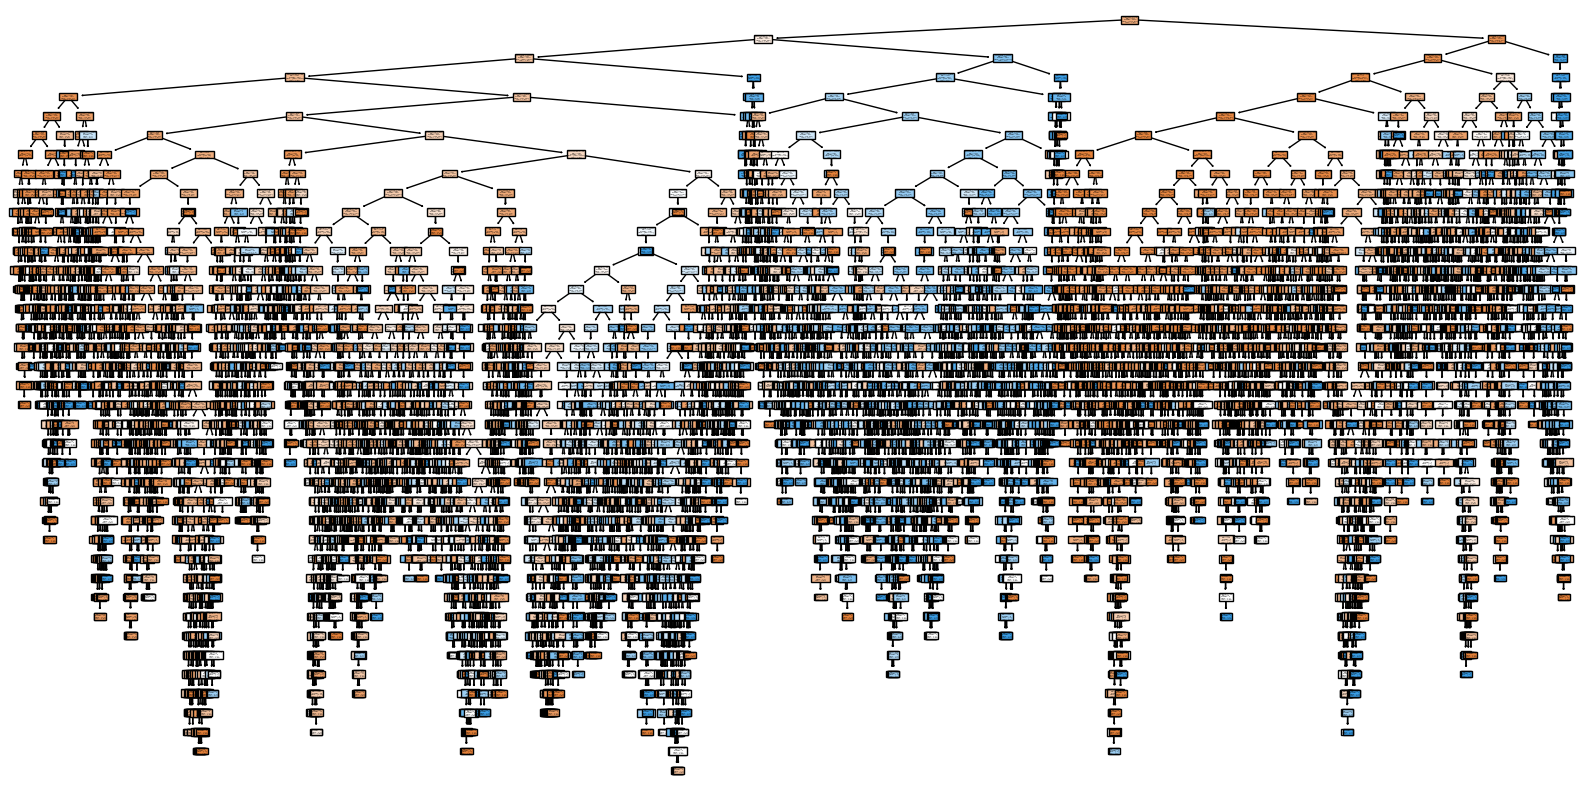

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()


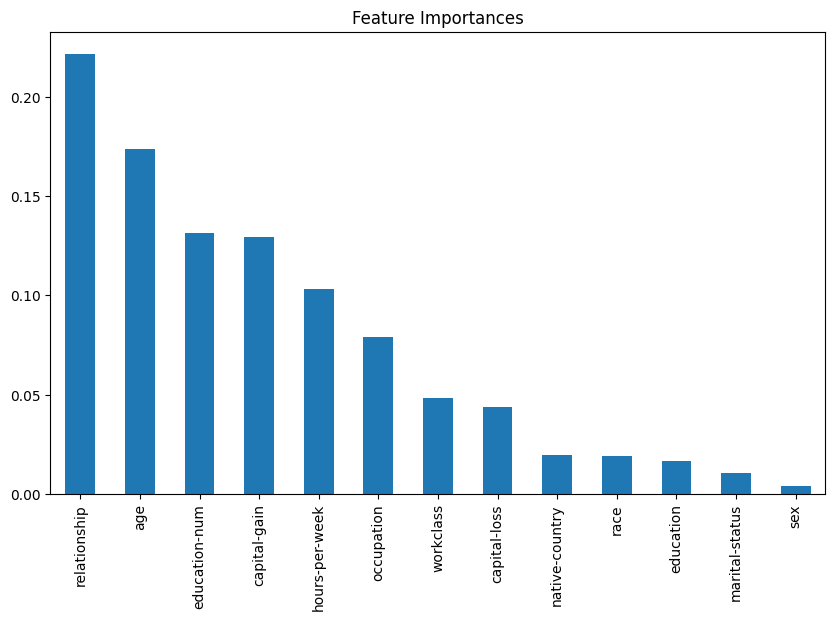

In [11]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


# Pregunta 2

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, 
                                 feature_names=X.columns, 
                                 class_names=['<=50K', '>50K'], 
                                 discretize_continuous=True)

samples = X_test.sample(3, random_state=42)

for idx, sample in samples.iterrows():
    exp = explainer.explain_instance(sample.values, rf_clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_all=False)
    print(f'Explanation for instance {idx}')
    print(exp.as_list())


c:\Users\DESKTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for instance 22737
[('capital-gain <= 0.00', -0.6106320512275636), ('hours-per-week > 45.00', 0.10222232134762435), ('education-num <= 9.00', -0.08884859389325367), ('age <= 28.00', -0.07908634711510086), ('2.00 < marital-status <= 4.00', -0.06916628128695615)]


c:\Users\DESKTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for instance 12322
[('capital-gain <= 0.00', -0.6272931625572693), ('hours-per-week <= 40.00', -0.10470974357685058), ('relationship <= 0.00', 0.08048159304167864), ('capital-loss <= 0.00', -0.0716960318385187), ('marital-status <= 2.00', 0.0709879559392438)]


c:\Users\DESKTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for instance 43915
[('capital-gain <= 0.00', -0.5849254728633786), ('hours-per-week <= 40.00', -0.10049874524304536), ('education-num <= 9.00', -0.09323088734921386), ('marital-status <= 2.00', 0.07710639930637597), ('age > 47.00', 0.050084075501350925)]
